In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones:

- initial_temps = [1e-1, 1, 10, 50, 100, 500]
- final_temps = [1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1]
- alphas = [0.85, 0.90, 0.93, 0.95, 0.97, 0.99, 0.995]
- max_iters = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5]

In [2]:
df = pd.read_csv("../results/configurations/sa_configurations1.csv")

In [3]:
print(df.head())
print(df.info())

  config_id  initial_temp  final_temp  alpha  max_iter  time  final_fitness  \
0   cfg_001           0.1    0.000001   0.85    1000.0  0.10      17.333333   
1   cfg_002           0.1    0.000001   0.85    5000.0  0.11      15.833333   
2   cfg_003           0.1    0.000001   0.85   10000.0  0.11      15.833333   
3   cfg_004           0.1    0.000001   0.85   50000.0  0.12      15.833333   
4   cfg_005           0.1    0.000001   0.85  100000.0  0.12      15.833333   

   validity  
0      True  
1      True  
2      True  
3      True  
4      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   config_id      1512 non-null   object 
 1   initial_temp   1512 non-null   float64
 2   final_temp     1512 non-null   float64
 3   alpha          1512 non-null   float64
 4   max_iter       1512 non-null   float64
 5   time           1512 no

In [4]:
valid_df = df[df["validity"]].copy()

best_config = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

In [5]:
print("Mejor configuración encontrada:")
print(best_config)

Mejor configuración encontrada:
config_id          cfg_133
initial_temp           0.1
final_temp            0.01
alpha                  0.9
max_iter            1000.0
time                  0.03
final_fitness    17.333333
validity              True
Name: 132, dtype: object


In [6]:
print("\nResumen estadístico de las soluciones válidas:")
print(valid_df.describe())


Resumen estadístico de las soluciones válidas:
       initial_temp   final_temp        alpha       max_iter         time  \
count   1512.000000  1512.000000  1512.000000    1512.000000  1512.000000   
mean     110.183333     0.185184     0.940714  111000.000000     0.673062   
std      177.897158     0.366259     0.048303  177400.152284     1.007487   
min        0.100000     0.000001     0.850000    1000.000000     0.000000   
25%        1.000000     0.000100     0.900000    5000.000000     0.110000   
50%       30.000000     0.005500     0.950000   30000.000000     0.250000   
75%      100.000000     0.100000     0.990000  100000.000000     0.712500   
max      500.000000     1.000000     0.995000  500000.000000     7.470000   

       final_fitness  
count    1512.000000  
mean       15.802381  
std         2.768645  
min         7.166667  
25%        15.833333  
50%        17.333333  
75%        17.333333  
max        17.333333  


In [7]:
print("Promedio de tiempo por configuración:")
print(valid_df["time"].mean())

Promedio de tiempo por configuración:
0.6730621693121693


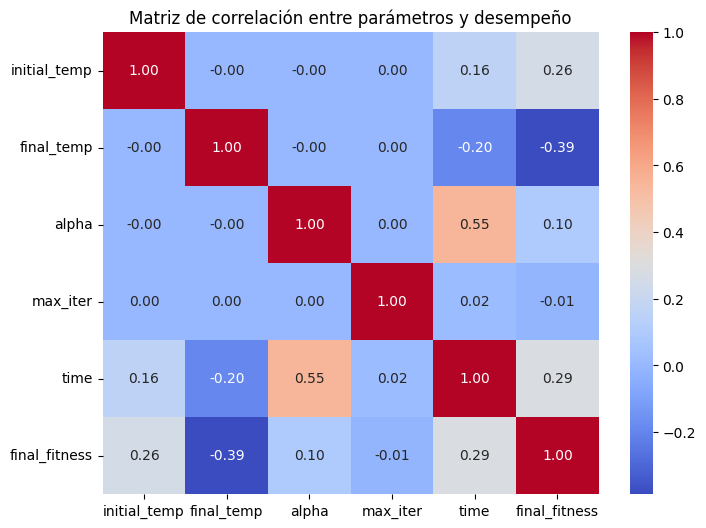

In [8]:
corr = valid_df[
    ["initial_temp", "final_temp", "alpha", "max_iter", "time", "final_fitness"]
].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre parámetros y desempeño")
plt.show()

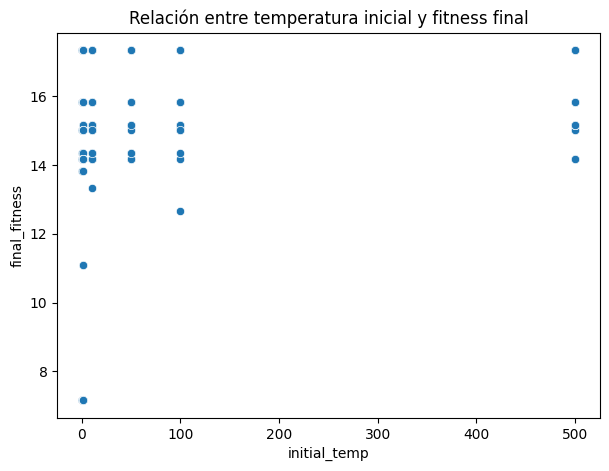

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="initial_temp", y="final_fitness")
plt.title("Relación entre temperatura inicial y fitness final")
plt.show()

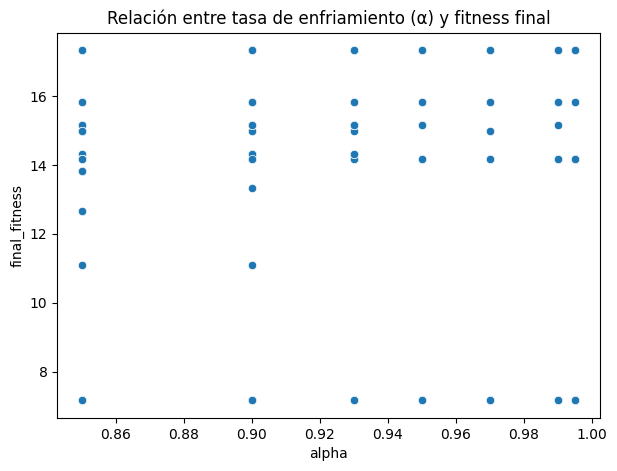

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="alpha", y="final_fitness")
plt.title("Relación entre tasa de enfriamiento (α) y fitness final")
plt.show()

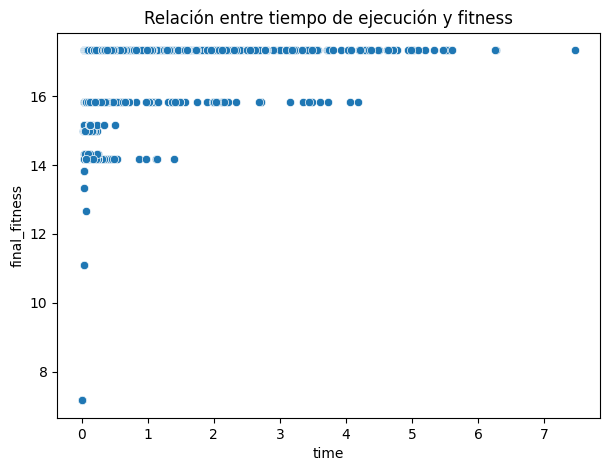

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="time", y="final_fitness")
plt.title("Relación entre tiempo de ejecución y fitness")
plt.show()

In [12]:
valid_df["fitness_per_time"] = valid_df["final_fitness"] / valid_df["time"]
best_efficiency = valid_df.loc[valid_df["fitness_per_time"].idxmax()]

print("Configuración más eficiente (mejor fitness/tiempo):")
print(best_efficiency)

Configuración más eficiente (mejor fitness/tiempo):
config_id            cfg_169
initial_temp             0.1
final_temp               0.1
alpha                   0.85
max_iter              1000.0
time                     0.0
final_fitness       7.166667
validity                True
fitness_per_time         inf
Name: 168, dtype: object


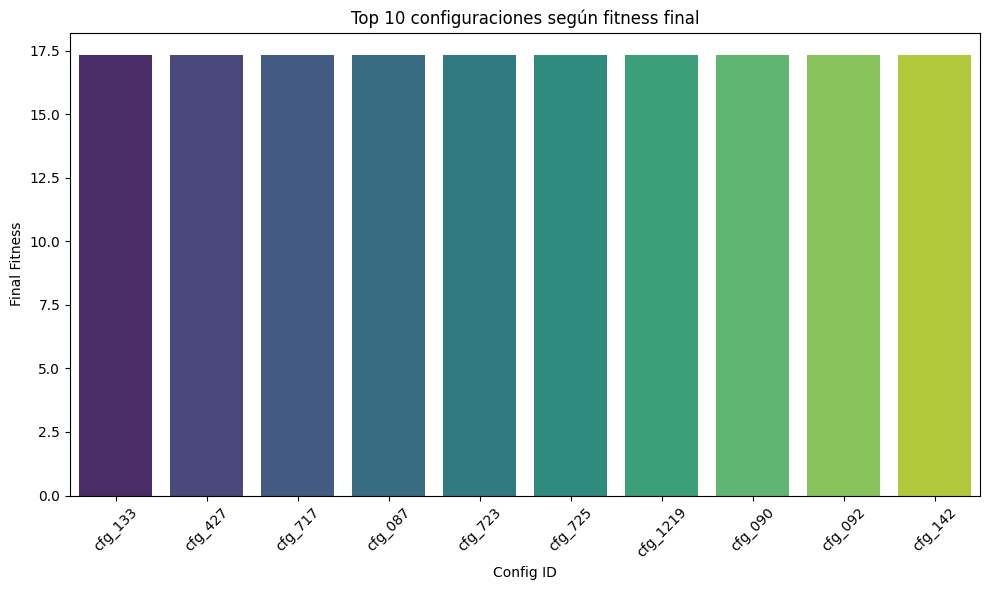

In [13]:
ranking = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking,
    x="config_id",
    y="final_fitness",
    hue="config_id",
    palette="viridis",
    legend=False,
)
plt.title("Top 10 configuraciones según fitness final")
plt.xlabel("Config ID")
plt.ylabel("Final Fitness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

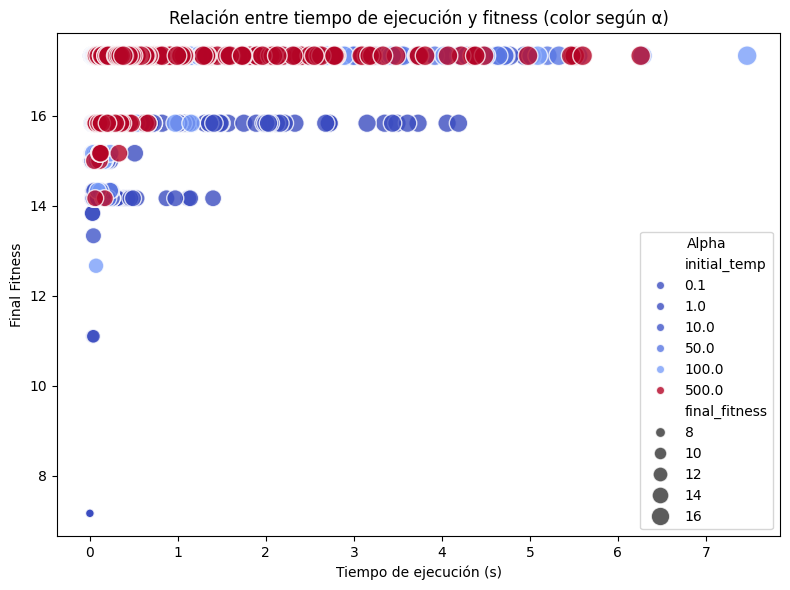

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="initial_temp",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

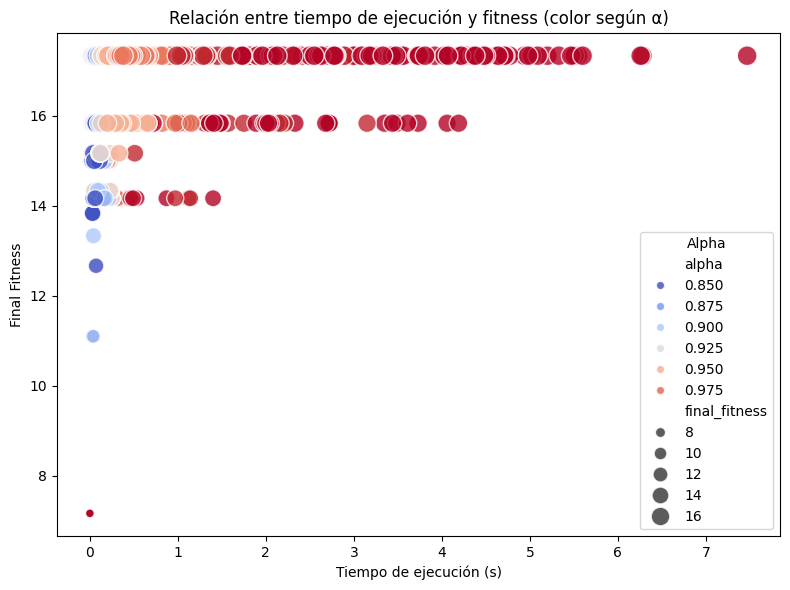

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="alpha",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

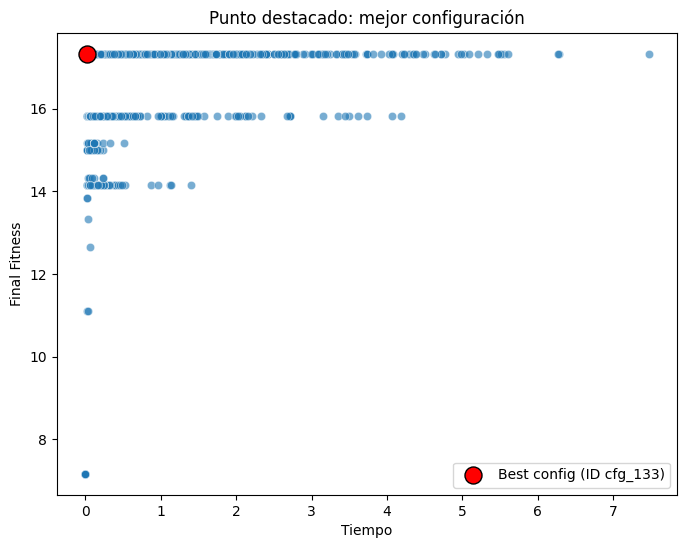

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=valid_df, x="time", y="final_fitness", alpha=0.6)
plt.scatter(
    best_config["time"],
    best_config["final_fitness"],
    color="red",
    s=150,
    edgecolor="black",
    label=f"Best config (ID {best_config['config_id']})",
)
plt.legend()
plt.title("Punto destacado: mejor configuración")
plt.xlabel("Tiempo")
plt.ylabel("Final Fitness")
plt.show()